In [38]:
import numpy as np
import constrastive_explaination_prototype.src.maxi as maxi
import matplotlib.pyplot as plt
import tensorflow as tf
from methods import data_handler

# Load imagenet data

In [29]:
from torchvision import datasets
import random
image_folder = datasets.ImageFolder(root=r'C:\Users\julia\Dokumente\GitHub\development\data2\imagenetv2-matched-frequency-format-val')

In [30]:
def sample_random_images(data_handler, number, seed=None):
    images = []
    img_paths = data_handler.imgs.copy()
    if seed:
        random.seed(seed)
    for i in range(number):
        rand_idx = random.randint(0, len(img_paths))
        rand_img_path = img_paths.pop(rand_idx)[0]
        rand_img = data_handler.loader(rand_img_path)
        # resize
        rand_img = rand_img.resize((224, 224))
        # convert to np array
        images.append(np.array(rand_img))
    return np.array(images)

In [41]:
labels = data_handler.get_labels()

Using downloaded and verified file: .\data/imagenet_class_index.json


In [31]:
x_test = sample_random_images(data_handler, 5, 5)

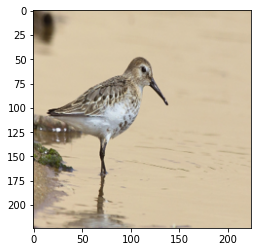

In [32]:
plt.imshow(x_test[3])

# Load model

In [33]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [34]:
x_test_pre = tf.keras.applications.vgg16.preprocess_input(x_test)

In [35]:
inputs = x_test_pre[3].reshape((-1, ) + x_test_pre[3].shape)

In [ ]:
inputs

In [43]:
pred_idx = model.predict(inputs).argmax()
pred_idx

140

In [44]:
labels[str(pred_idx)]

['n02027492', 'red-backed_sandpiper']

In [46]:
AE = None

# Load autoencoder (optional)

In [16]:
from autoencoder.autoencoder import Autoencoder

In [18]:
# AE = Autoencoder(load_path="files/iamgenet_ae3.h5")

In [45]:
callable(AE)

False

In [51]:
import pandas as pd
df = pd.DataFrame([[1, 8, 4], [6, 9, 3]])

In [56]:
df

,0,1,2
0,1,8,4
1,6,9,3


In [58]:
df[df.columns[0:2]]

,0,1
0,1,8
1,6,9


# PN

In [47]:
loss_class = maxi.TF_CEMLoss
optimizer_class = maxi.AdaExpGradOptimizer
gradient_class = maxi.TF_Gradient

loss_kwargs = {"mode": "PP", "c": 1, "gamma": 3, "K": 20, "AE": AE}
optimizer_kwargs = {"l1": 0.025, "l2": 0.000025, "eta": 1.0, "channels_first": False}
gradient_kwargs = {}

In [48]:
cem = maxi.ExplanationGenerator(
    loss=loss_class,
    optimizer=optimizer_class,
    gradient=gradient_class,
    num_iter=1000,
    loss_kwargs=loss_kwargs,
    optimizer_kwargs=optimizer_kwargs,
    gradient_kwargs=gradient_kwargs,
    save_freq=250,
    verbose=True,
)

In [49]:
results, _ = cem.run(image=inputs, inference_call=model)

iteration:      1 || overall_loss:     0.0116 | attack_loss: 0.0116 | l1: 0.000000 | l2: 0.000000


C:\Users\julia\Dokumente\GitHub\development\constrastive_explaination_prototype\src\maxi\lib\computation_components\optimizer\ada_exp_grad.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  self.y[:] = 1.0 / self.t * self.x + (1 - 1.0 / self.t) * self.y
C:\Users\julia\anaconda3\envs\xai_env\lib\site-packages\tensorflow\python\framework\constant_op.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


iteration:     10 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:     20 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:     30 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:     40 || overall_loss: 10135.9531 | attack_loss: 0.1144 | l1: 9895.545313 | l2: 240.294150
iteration:     50 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:     60 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294257
iteration:     70 || overall_loss: 10135.9561 | attack_loss: 0.1144 | l1: 9895.547656 | l2: 240.294257
iteration:     80 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:     90 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1: 9895.546094 | l2: 240.294203
iteration:    100 || overall_loss: 10135.9541 | attack_loss: 0.1144 | l1:

KeyboardInterrupt: 

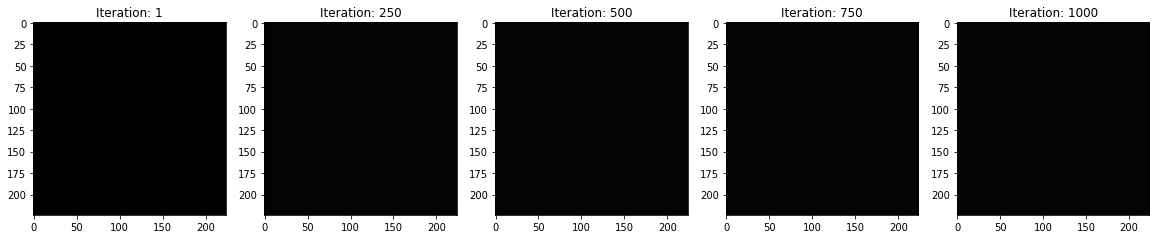

In [14]:
f, axarr = plt.subplots(1, len(results))
f.set_figheight(4)
f.set_figwidth(20)
for i, (iter, result) in enumerate(results.items()):
    axarr[i].title.set_text("Iteration: " + iter)
    # axarr[i].imshow(result.squeeze(axis=-1).squeeze(axis=0), cmap="gray", vmin=-0.5, vmax=0.5)
    axarr[i].imshow(result[0], cmap="gray", vmin=-0.5, vmax=0.5)

In [20]:
# input prediction
model.predict(inputs).argmax()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


669

In [21]:
# PN prediction: should have changed
model.predict(results["1000"]).argmax()

669

# PP

In [1]:
loss_kwargs = {"mode": "PP", "c": 1, "gamma": 3, "K": 20, "AE": AE}
optimizer_kwargs = {"l1": 0.025, "l2": 0.000025, "eta": 1.0, "channels_first": False}
gradient_kwargs = {"mu": None}

NameError: name 'AE' is not defined

In [ ]:
    cem = maxi.ExplanationGenerator(
        loss=loss_class,
        optimizer=optimizer_class,
        gradient=gradient_class,
        num_iter=1000,
        loss_kwargs=loss_kwargs,
        optimizer_kwargs=optimizer_kwargs,
        gradient_kwargs=gradient_kwargs,
        save_freq=250,
        verbose=True,
    )

In [ ]:
results, _ = cem.run(image=inputs, inference_call=model)

In [ ]:
f, axarr = plt.subplots(1, len(results))
for i, (iter_, result) in enumerate(results.items()):
    axarr[i].title.set_text("Iteration: " + iter_)
    axarr[i].imshow(result.squeeze(axis=-1).squeeze(axis=0), cmap="gray", vmin=-0.5, vmax=0.5)